Load Cancer Dataset

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_breast_cancer

cancer_ds = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer_ds.keys()))
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer_ds.target_names, np.bincount(cancer_ds.target))}))

# Información del Dataset
cancer_ds.DESCR
cancer_ds.feature_names



cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:
{'malignant': 212, 'benign': 357}


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Data Preprocessing


In [58]:
#Espacio para preprocesamiento del dataset: eliminación de outliers, elimación datos faltantes, noramlización....

Particionar Data Set

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_ds['data'], cancer_ds['target'],
                  train_size=0.7, test_size=0.3, random_state=0, stratify=cancer_ds['target'], shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_train)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (398, 30)
y_test : [1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1]
y_train shape: (398,)
X_test shape: (171, 30)
y_test shape: (171,)


Building the Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier(max_depth=2, random_state=0) 
# criterion {“gini”, “entropy”, “log_loss”}, 
#rfc = RandomForestClassifier(criterion='entropy' ,max_depth=2, random_state=0)
#rfc = RandomForestClassifier(max_depth=10,random_state=0 )
#rfc = RandomForestClassifier(class_weight='balanced', max_depth=10,random_state=0 )

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)


#Predicting the model on training and test sets.
y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score

rfc_train = accuracy_score(y_train, y_train_pred_rfc)
rfc_test = accuracy_score(y_test, y_test_pred_rfc)

print(f"Random Forest train / test accuracies: {rfc_train: .3f} / {rfc_test: .3f}")


Random Forest train / test accuracies:  1.000 /  0.953


___
Confusion Matrix 
---
Test Data Set : Random Forest Classifier

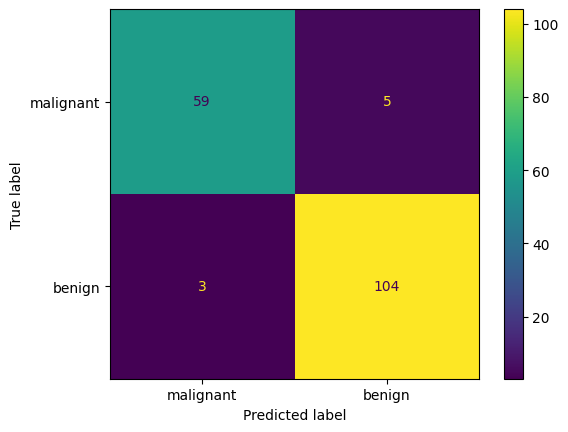

Text(0.5, 1.0, 'Confusion Matrix:  Test - Random Forest')

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cancer_ds.target_names)
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Random Forest')

---
Feature Selection with Random Forest
---
Without Optimizer

In [62]:
importances = rfc.feature_importances_
#display(importances)

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
#display(sorted_indices)

# Dataset Features Names 
feat_labels=cancer_ds.feature_names
# display(cancer_ds.feature_names) 

# Display Features Names list  by importances ordre
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
    

 1) worst perimeter                0.171088
 2) worst radius                   0.127990
 3) worst concave points           0.108371
 4) mean concave points            0.093999
 5) mean perimeter                 0.075574
 6) mean concavity                 0.067943
 7) worst area                     0.066153
 8) mean area                      0.049450
 9) area error                     0.032592
10) worst concavity                0.030939
11) radius error                   0.024119
12) mean radius                    0.021675
13) mean texture                   0.021239
14) perimeter error                0.013915
15) worst texture                  0.013366
16) worst compactness              0.011925
17) worst fractal dimension        0.009518
18) worst smoothness               0.008240
19) worst symmetry                 0.006817
20) mean compactness               0.006249
21) texture error                  0.005543
22) symmetry error                 0.004782
23) mean smoothness             

---
Visualize Feature Importance

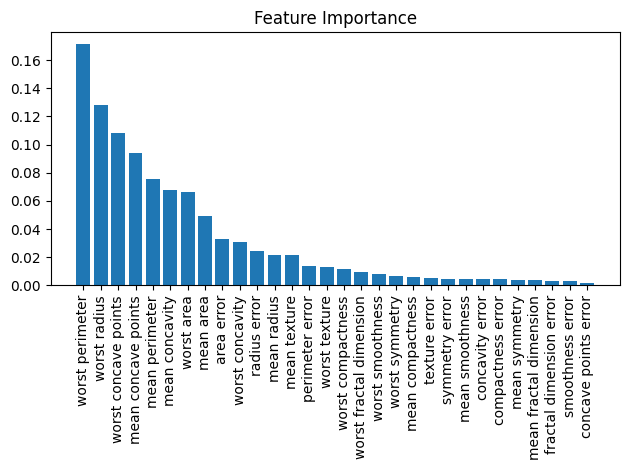

In [63]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
# reading csv files
data =  pd.read_csv('../../../../../../Downloads/letter+recognition/letter-recognition.data', sep="," , header=None)
print(data)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0      T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1      I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2      D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3      N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4      G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19995  D   2   2   3   3   2   7   7   7   6   6   6   4   2   8   3   7
19996  C   7  10   8   8   4   4   8   6   9  12   9  13   2   9   3   7
19997  T   6   9   6   7   5   6  11   3   7  11   9   5   2  12   2   4
19998  S   2   3   4   2   1   8   7   2   6  10   6   8   1   9   5   8
19999  A   4   9   6   6   2   9   5   3   1   8   1   8   2   7   2   8

[20000 rows x 17 columns]
